In [1]:
from pandas_profiling import ProfileReport
import matplotlib as mpl
import pandas as pd


filename = 'converted/EX0502.csv'
df_data = pd.read_csv(filename).set_index('PERSON')

df_data

,SBP,QUET,AGE,SMK
PERSON,,,,
1,135,2.876,45,0
2,122,3.251,41,0
3,130,3.100,49,0
4,148,3.768,52,0
5,146,2.979,54,1
6,129,2.790,47,1
7,162,3.668,60,1
8,160,3.612,48,1
9,144,2.368,44,1


In [2]:
# initialize matplotlib dpi to get nice crisp hi-res images!
mpl.rcParams['figure.dpi'] = 300

In [3]:
# Systolic Blood Pressure (SBP) [Y],
# Age (AGE) [X1],
# Smoking History (SMK=1 if current or previous smoker, 0 otherwise) [X2],
# and Body Size (QUET) [X3].

Y = 'SBP'
X123 = ['AGE', 'SMK', 'QUET']
X1 = X123[0]
X2 = X123[1]
X3 = X123[2]

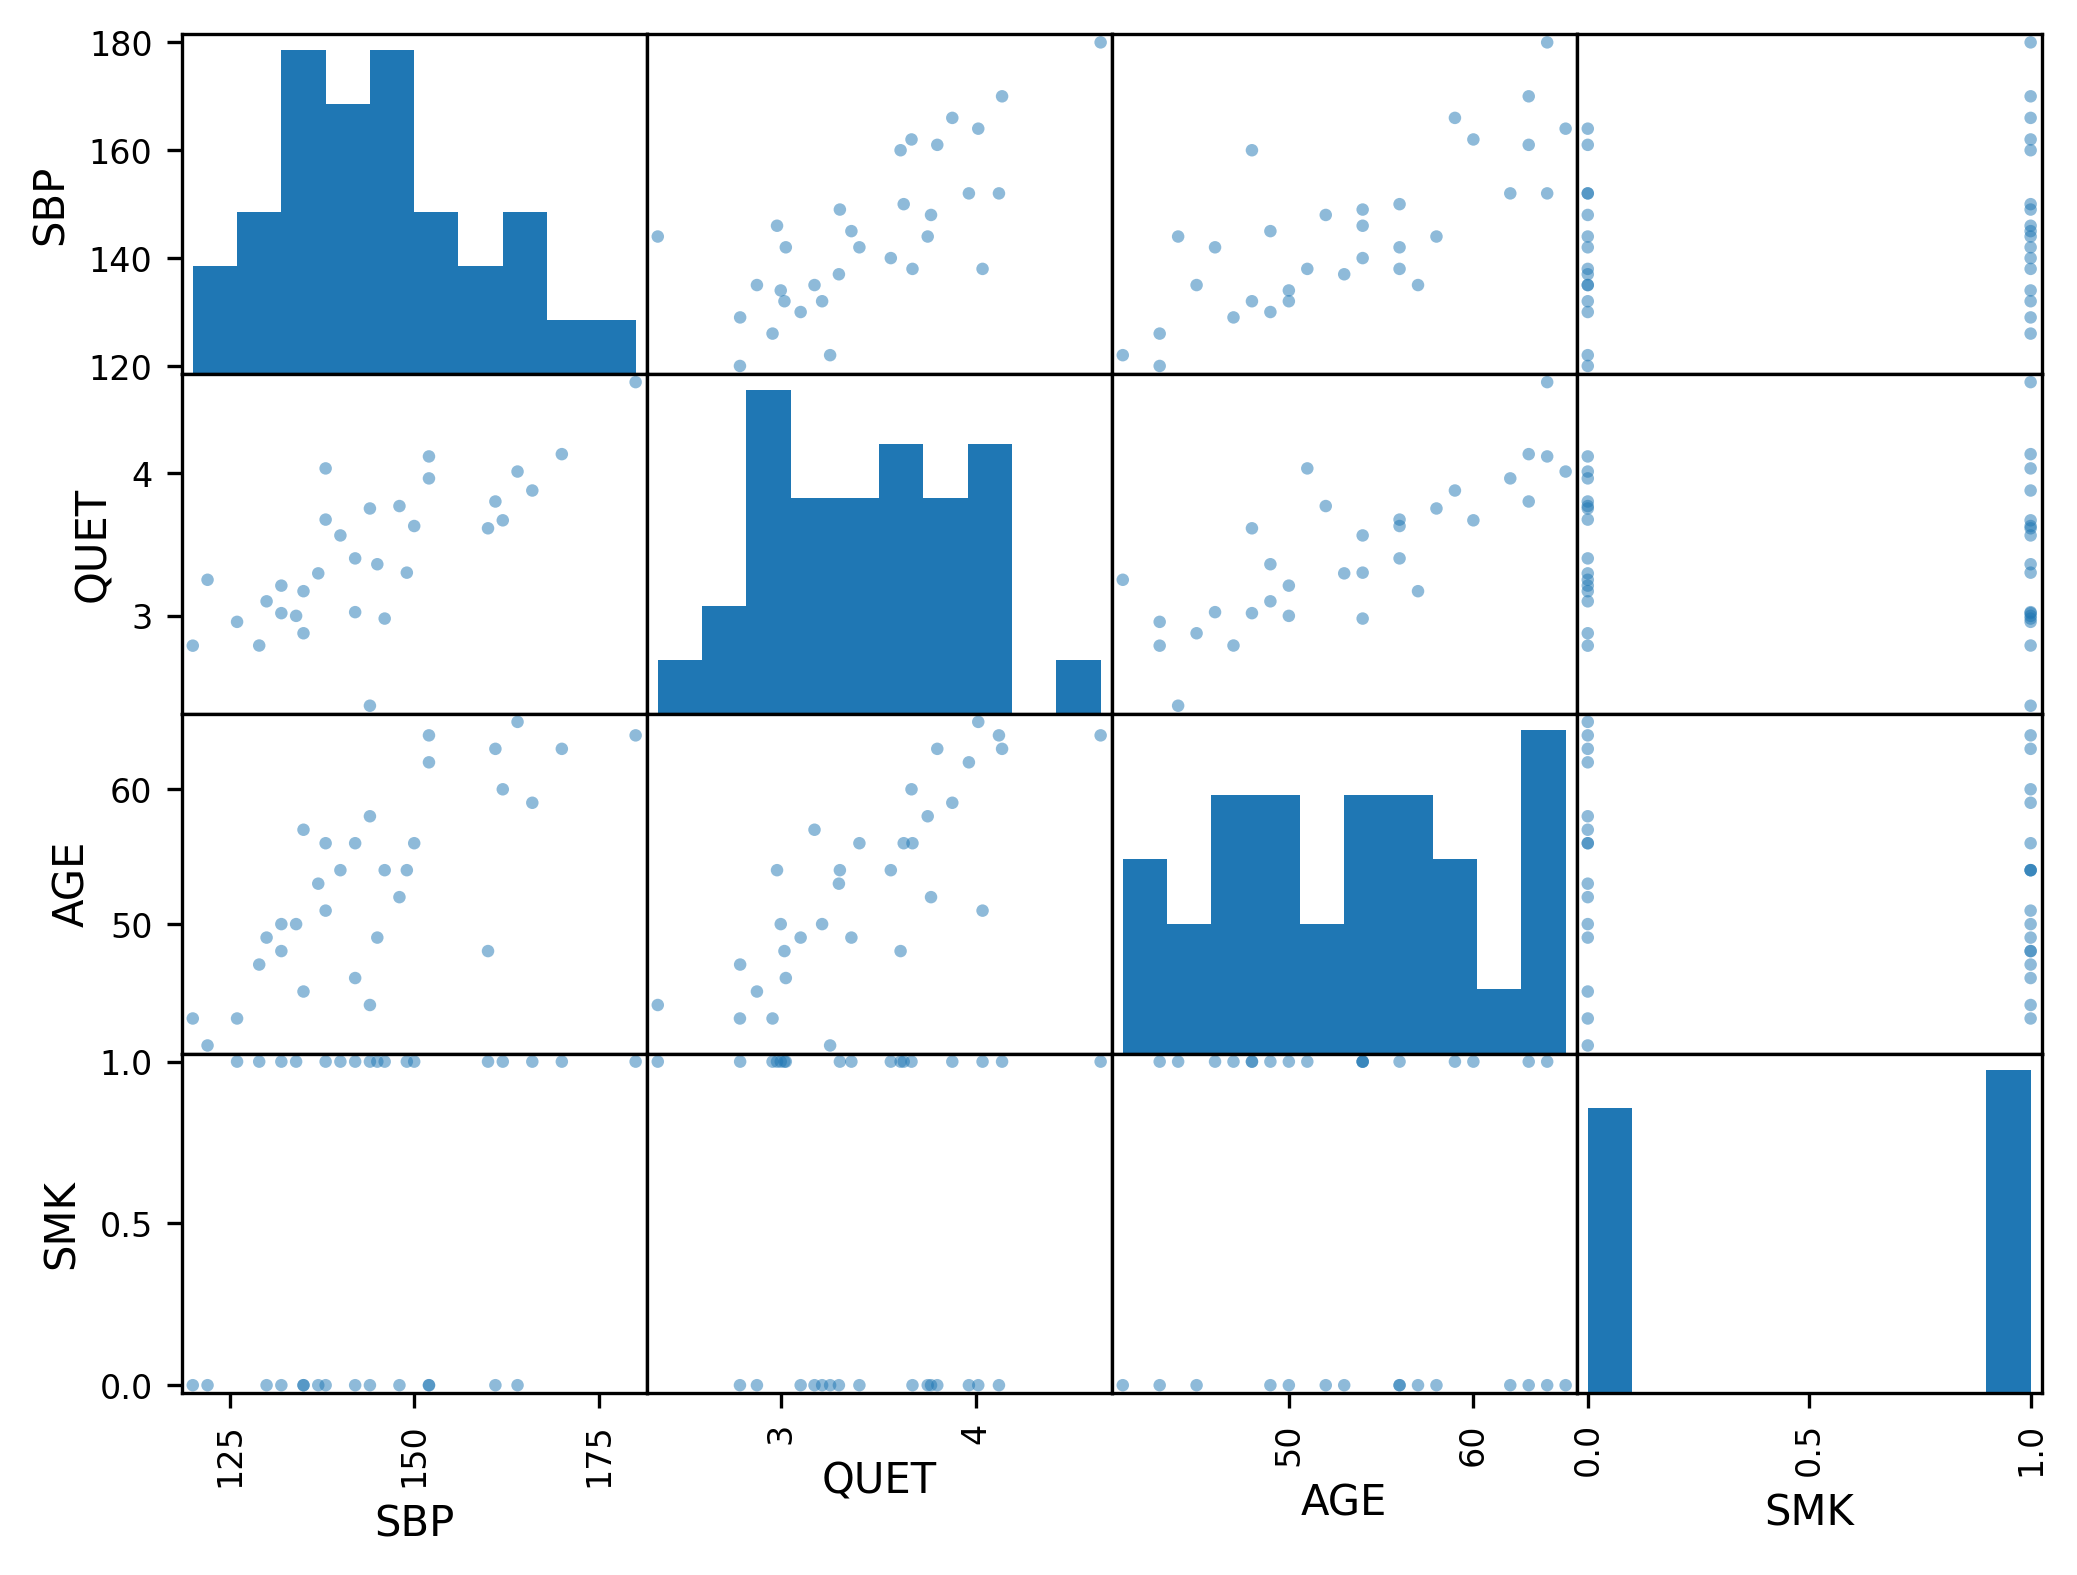

In [4]:
# 1a plot the data and visually investigate the pairwise linear relationships between the variables [Y, X1, X2, X3]

pd.plotting.scatter_matrix(df_data, figsize=(8, 6))

None

In [5]:
# I'm just plotting the PearsonsR correlations for fun as well

df_corr = df_data.corr()
df_corr.style.background_gradient(cmap='coolwarm_r')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,SBP,QUET,AGE,SMK
SBP,1.000000,0.742004,0.775204,0.247333
QUET,0.742004,1.000000,0.802751,-0.071370
AGE,0.775204,0.802751,1.000000,-0.139486
SMK,0.247333,-0.071370,-0.139486,1.000000


In [10]:
# 1b un each simple linear regression using Y as the response
# with thesingle regressor X1, then again with X2, then again
# with X3. Comment on which one has the highest R-squared,
# while having a look at the plot to see if this one appears 
# to have the strongest linear relationship. 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


y_label = Y

for i in range(0, len(X123)):
    x_label = X123[i]
    
    x = df_data[x_label]
    y = df_data[y_label]

    X = sm.add_constant(x)

    model = sm.OLS(y, X)
    results = model.fit()

    #print(results.summary())
    print(f'{y_label} - {x_label}', 'R2:', results.rsquared)
    
print("""
R2 is highest for SBP - AGE.
Not sure if it has the strongest linear relationship by eyeing the plot from 1a,
this is rather difficult to see visually.
""".rstrip())

SBP - AGE R2: 0.600941356118484
SBP - SMK R2: 0.061173369659587196
SBP - QUET R2: 0.5505700193721006

R2 is highest for SBP - AGE.
Not sure if it has the strongest linear relationship by eyeing the plot from 1a,
this is rather difficult to see visually.


In [150]:
# 1c We will run a multiple regressionwith Y=SBP and X1=AGE, X2=SMK, X3=QUET

x = df_data[X123]
y = df_data[y_label]

X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())
print(f'R2:', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     29.71
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           7.60e-09
Time:                        15:37:14   Log-Likelihood:                -107.35
No. Observations:                  32   AIC:                             222.7
Df Residuals:                      28   BIC:                             228.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1032     10.765      4.190      0.0

/home/thomas/work/nihes/ESP09/venv/lib64/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [21]:
# 1c1 Provide the least-squares regression equation
trans = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
params = results.params
decimals = 4

βi = results.params

Bx = round(βi[0], decimals)
formula = f'y = {Bx} + '

for i in range(1, len(βi)):
    Bx = round(βi[i], decimals)
    formula += f'{Bx}X{str(i).translate(trans)} + '
    
formula = formula[:-3]

print(formula)

y = 45.1032 + 1.2127X₁ + 9.9456X₂ + 8.5924X₃


In [23]:
# 1c2 Provide a confidence interval for the estimated slopes(for each of Quet, Age and Smoke), 
#   and interpret (using proper units)
results.conf_int(.05)

,0,1
const,23.052345,67.154039
AGE,0.549401,1.876028
SMK,4.504883,15.386253
QUET,-0.622682,17.807579


In [55]:
df_data.loc[1][X123]

array([45.   ,  0.   ,  2.876])

In [64]:
# 1c3 For Person 1 (QUET=2.876, AGE=45, SMK=0 [nonsmoker]), provide the predicted value (fit),
#   and the 95% confidence interval for the mean, as well as the 95% prediction interval 
#   for this individual.

# retrieve subject 1 data, order X1/X2/X.. according to X123 array and retrieve values
test_results = results.get_prediction([1, *df_data.loc[1][X123].values])

# retrieve summary frame
test_results.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,124.387232,2.636478,118.986653,129.787812,108.282366,140.492099


In [88]:
# 1c4 Using the ANOVA Table, provide the r-square (and r) values, interpret.
# Using the ANOVA Table, provide the r-square (and r) values, interpret.
from statsmodels.formula.api import ols


mod = ols(f'{y_label} ~ {"+".join(X123)}', data=df_data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=1)
print(aov_table)

print()
ss_total = aov_table.sum_sq.sum()
r2_explained = 0
for idx, row in aov_table.iterrows():
    r2 = row.sum_sq / ss_total
    if idx != 'Residual':
        r2_explained += r2
        
    print(f'{idx} explains R2={r2*100:.2f}% of {y_label}')
    
print(f'Grouping {", ".join(X123)} together explains R2={r2_explained*100:.2f}% of {y_label}')
print(f'Models R2={results.rsquared*100:.2f}% explained, should be equal to R2 above')

            df       sum_sq      mean_sq          F        PR(>F)
AGE        1.0  3861.630375  3861.630375  70.387748  3.987061e-09
SMK        1.0   828.053854   828.053854  15.093326  5.714718e-04
QUET       1.0   200.141468   200.141468   3.648072  6.642678e-02
Residual  28.0  1536.143053    54.862252        NaN           NaN

AGE explains R2=60.09% of SBP
SMK explains R2=12.89% of SBP
QUET explains R2=3.11% of SBP
Residual explains R2=23.91% of SBP
Grouping AGE, SMK, QUET together explains R2=76.09% of SBP
Models R2=76.09% explained, should be equal to R2 above


In [89]:
# 1c5 What is the estimate of the common variance about the regression line,
#   and based on plots does this assumption of common variance seem reasonable.

# > This puzzles me, need to figure this out later

In [95]:
# 1d Next we consider prediction of a new observation,
# say for a 50 year old, Smoker,
# with a Queteletindex of 3.0.
#

observation1 = [50, 1, 3.0]

# 1d1 First we get the estimated (predicted) SBP for this individual
#   by plugging in the corresponding AGE, SMK, and QUET into the 
#   least-squares equation.

test_results = results.get_prediction([1, *observation1])

# retrieve summary frame
test_results.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,141.461837,2.221449,136.911405,146.012269,125.621796,157.301878


In [118]:
# 1d2 Next, we consider the same individual, at the same age and
#   smoking status, but with an increased  Quetelet index of 4.0.
#   How much does this increase of 1 unit in QUET affect the 
#   estimated SBP?
#
observation2 = [50, 1, 4.0]

test_results = results.get_prediction([[1, *observation1], [1, *observation2]])

df_summary = test_results.summary_frame()
df_summary.index = ['observation1', 'observation2']

# calculate the increase in bloodpressure
increase = df_summary['mean'].diff().values[1]
print(f'SBP increased by {increase:.2f} between observation1 / observation2')

# diff the two observations and at on index diff in dataframe
df_summary.loc['diff'] = df_summary.diff(axis=0).iloc[1]
df_summary

SBP increased by 8.59 between observation1 / observation2


,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
observation1,141.461837,2.221449,136.911405,146.012269,125.621796,157.301878
observation2,150.054286,3.761558,142.349083,157.759488,133.037511,167.071060
diff,8.592449,1.540109,5.437678,11.747219,7.415715,9.769182


In [125]:
# 1d3 Compare the above increase in SBP to the actual estimated
#   parameter estimate (coefficient) for QUET (when moving from QUET
#   of 3.0to 4.0, holding the other regressors fixed). 
#   [This is the definition of the partial regression coefficient].
#
print('Model parameter estimate QUET: ', results.params['QUET'])
print('increase == X3? ', increase == results.params['QUET'])

Model parameter estimate QUET:  8.592448658829142
increase == X3?  True


In [ ]:
# 1d4 Now let’s check our answers in SPSS. Go to the original data editor
#   in SPSS and add two rows of data at the very bottom. Leave SBP blank (missing)
#   and put in the (50, 1, 3.0) and also the (50, 1, 4.0). Rerun the linear 
#   regression, while saving the (unstandardized) predicted values. The last two
#   should confirm your hand calculations. 
#

# No SPSS here. We are using Python, language of the Gods! See code above. :-)

In [142]:
# 1e Next we do some basic testing.
#
# 1e1 Note the overall p-value, that is provided in the ANOVA table for the multiple
#   regression, is less than 0.001 (with an F-statistic of 29.71). What is the 
#   hypothesis that corresponds to this p-value? How is the F-statistic constructed?
#   And what are the degrees-of-freedom for this test? What is your conclusion?
#
import scipy.stats

print('H0 = B1 = B2 = B3 = 0')
print(f'P: {results.f_pvalue:.8f}, F: {results.fvalue:.2f}')

p_crit = 0.05  # fixed constant
print('P-crit: ', p_crit)

# calculate F ciritcal score
dfe = len(X123)  # number of independent variables
dfd = df_data.shape[0] - len(X123)
f_crit = scipy.stats.f.ppf(q=1-0.05, dfn=dfe, dfd=dfd)
print('F-crit: ', f_crit)

if results.f_pvalue < p_crit and results.fvalue > f_crit:
    print('H0 rejected, at least one of the regressors is important')
else:
    print('H0 confirmed, none of the regressors is important')

H0 = B1 = B2 = B3 = 0
P: 0.00000001, F: 29.71
P-crit:  0.05
F-crit:  2.9340298896641714
H0 rejected, at least one of the regressors is important


In [145]:
# 1e2 Note the p-values that correspond to the partial tests of AGE, SMK, and QUET,
#   respectively, are 0.0008, 0.0008, and 0.0664. What are the hypotheses that
#   tested with each of these p-values. Each of these p-valuesuse a T-statisitic,
#   explain its construction andprovide your conclusion for each of these three
#   partial tests.
#

print('These P-values test the statistical significance of that individual parameter as contributing to the regressors result')
results.pvalues

These P-values test the statistical significance of that individual parameter as contributing to the regressors result


const    0.000252
AGE      0.000829
SMK      0.000830
QUET     0.066427
dtype: float64

In [158]:
# Lastly, we determine whether or not AGE has a significant quadratic effect (AGESQ).
# We first have to construct a new variable AGESQ.  
#  Go to the Transform tab → Compute Variable and put AGESQ as the target
#  and  the numerical expression AGE*AGE.  
#

df_qeffect = df_data.copy()
df_qeffect['AGESQ'] = df_qeffect['AGE'] * df_qeffect['AGE']

#  As previously, from the pull down menu, 
#  follow:  Analyze→ Regression→ Linear and then specify the variables Dependent: SBP 
#  and Independent: AGE, AGESQ, SMK, QUET.
#

X1234 = ['AGESQ', *X123]  # generate X1234

x = df_qeffect[X1234]
y = df_qeffect[y_label]

X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())
print(f'R2:', results.rsquared)

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     24.30
Date:                Wed, 18 Aug 2021   Prob (F-statistic):           1.30e-08
Time:                        15:39:51   Log-Likelihood:                -105.83
No. Observations:                  32   AIC:                             221.7
Df Residuals:                      27   BIC:                             229.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        178.1737     81.758      2.179      0.0

/home/thomas/work/nihes/ESP09/venv/lib64/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [161]:
# Comment on the partial test for AGESQ: what is the specific hypothesis being tested? 
# What is your conclusion
#

print(f"AGESQ is non-significant as P>.05 P={results.pvalues.loc['AGESQ']}")

AGESQ is non-significant as P>.05 P=0.11238113874107039
